## Regularization Techniques

In this notebook, we will perform three regularization tecniques to ovoid overffiting, these will be, RIdge,Lasso and Elastic regression, the purpose of Regularization techniques is to reduce the degree of overfitting that can occur in Regression models. Overfitting leads to poor ability of the model to make predictions on the new, test data.

Lasso will eliminate many features and reduce overfitting in your linear model. Ridge will reduce the impact of the features that are not important in predicting your target. Elastic Net combines feature elimination from Lasso and feature coefficient reduction from the Ridge model to improve your model’s predictions.


First we import the necesary libraries.

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import scale, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [3]:
#This function will calculate the R2 metric on each feature given the input of the model.

def get_R2_features(model,test=True): 
    #X: global  
    features=list(X)
    features.remove("three")
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R2 mean value {} Testing R2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R2 max value {} Testing R2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

In [4]:
#This function will plot the estimated coefficients for each feature and find R2 metric on training and testing sets.

def plot_coef(X,model,name=None):
    
    plt.bar(X.columns[2:],abs(model.coef_[2:]), color ='g')
    plt.xticks(rotation=90)
    plt.ylabel("$coefficients$")
    plt.title(name)
    plt.show()
    print("R2 on training  data ",model.score(X_train, y_train))
    print("R2 on testing data ",model.score(X_test,y_test))

In [5]:
#This function will plots the distribution of two inputs.

def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

### Reading and understanding our data


For this project, we will be using the car sales dataset, hosted on IBM Cloud object storage. This dataset can also be found and downloaded from kaggle.com, an open public data source. The dataset contains all the information about cars, a name of a manufacturer, all car's technical parameters and a sale price of a car.

This dataset has already been pre-cleaned and encoded (using one-hot and label encoders) in the Linear Regression Notebook, which you can find in this same repository.

Let's first read the data and check how many rows and columns we have.


In [6]:
data = pd.read_csv('encoded_car_data.csv')
data.head()
# data.shape (205, 36)

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


We use the info() method to see more information about the features of the data set.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

First we will split our data into X features and y target.

In [8]:
X = data.drop('price', axis=1)
y = data.price

Now, we split our data, using train_test_split function, into the training and testing sets, and left 30% of the data for testing.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)
print("shape of test: ", X_test.shape)
print("shape of training: ", X_train.shape)


shape of test:  (21, 35)
shape of training:  (184, 35)


### Linear Regression



First, we will perform a normal linear regression to see how it works and better explain the others.

Let's create a LinearRegression object, called lm.

In [10]:
lm = LinearRegression()

Now, let's fit the model with our X_train and y_train data.


In [11]:
lm.fit(X_train, y_train)

LinearRegression()

Now, we apply predict() function on the testing data set.

In [12]:
predicted = lm.predict(X_test)

Let's calculate the R2 metric on both, training and testing data sets.


In [13]:
print("R^2 on training  data ",lm.score(X_train, y_train))
print("R^2 on testing data ",lm.score(X_test,y_test))

R^2 on training  data  0.9092101381197338
R^2 on testing data  0.9472499250320893


As we can see, we obtain a good result.

We also can plot a distribution of the predicted values vs the true values.

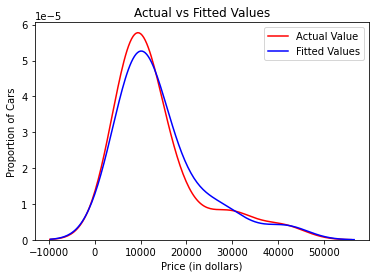

In [14]:
plot_dis(y_test,predicted)

We also can view the estimated coefficients for the linear regression and drop the top two coefficients, as they are two large.


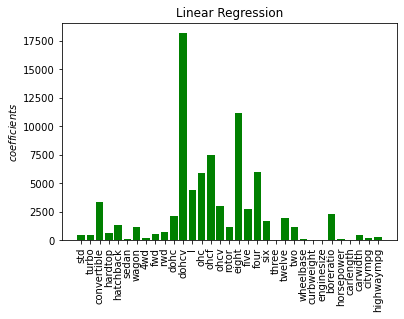

R2 on training  data  0.9092101381197338
R2 on testing data  0.9472499250320893


In [15]:
plot_coef(X,lm,name="Linear Regression")

### Ridge Regression


Now, let's perform a Ridge Regression to see how it works, first Ridge Regression makes the prior assumption that our coefficients are normally distributed around zero. 

A regularization term, alpha, is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. The variance of the distribution is inversely proportional to the parameter alpha. This is also called the  L2 regularizer.

We minimize the MSE, but we also penalize large weights in the minimization term. This additional minimization term makes the model less susceptible to noise and makes the weights smaller. Alpha controls the takeoff between MSE and penalization or regularization term and is chosen via cross-validation.


Let's see  how the parameter alpha changes the model. Note, here our test data will be used as validation data. Also, the regularization term should only be added to the cost function during the training.

Let's create a Ridge Regression object and we will set the regularization parameter (alpha) to 0.01.


In [16]:
rr = Ridge(alpha=0.01)
rr

Ridge(alpha=0.01)

Now we fit the model using the fit() method.

In [17]:
rr.fit(X_train, y_train)

Ridge(alpha=0.01)

Now, we obtain a prediction:

In [18]:
rr.predict(X_test)

array([30178.77172992, 22179.93145434, 11229.58960483, 11790.40337149,
       26348.13785546,  5439.13547145,  9054.02541015,  7265.36558563,
       10591.48456189, 10390.82134687, 17471.12024994,  7010.47430228,
       16547.06078383, 10468.27937016, 41540.38102791,  5390.34659152,
        5109.76377302, 15373.1930261 , 10703.56615831, 11448.33242702,
       10565.49269055])

We calculate the R2 on the training and testing data.


In [19]:
print("R2 on training  data ",rr.score(X_train, y_train))
print("R2 on testing data ",rr.score(X_test,y_test))

R2 on training  data  0.9091956531801181
R2 on testing data  0.9478784615596495


Now let's compare the Ridge Regression and the Linear Regression  models. The results on the R2 are about the same, and the coefficients seem to be smaller.

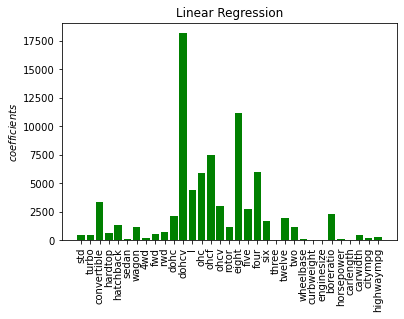

R2 on training  data  0.9092101381197338
R2 on testing data  0.9472499250320893


In [20]:
plot_coef(X,lm,name="Linear Regression")

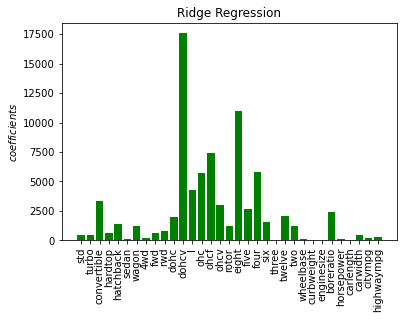

R2 on training  data  0.9091956531801181
R2 on testing data  0.9478784615596495


In [21]:
plot_coef(X,rr,name="Ridge Regression")

If we increase term alpha, the coefficients get smaller, but the results are not as good as our previous value of alpha.

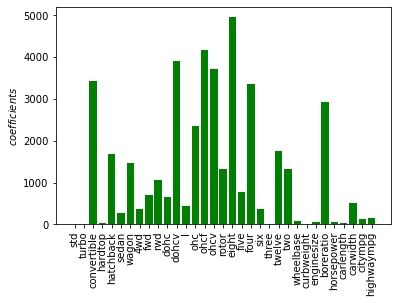

R2 on training  data  0.8991374778636108
R2 on testing data  0.9446031107273956


In [22]:
rr = Ridge(alpha=1)
rr.fit(X_train, y_train)
plot_coef(X,rr)

As we can see if we increase alpha, the coefficients get smaller, but the model performance relationship gets more complex. As a result, we use the validation data to select a value for alpha. Here, we plot the coefficients and R2 of the test data on the vertical axes and alpha on the horizontal axis, as well the R2 using the test data.


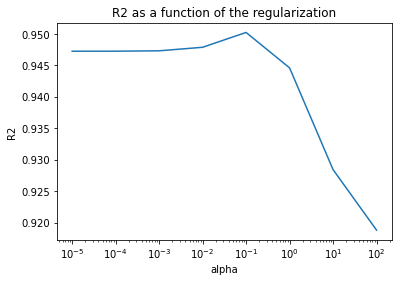

In [23]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
R_2=[]
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    coefs.append(abs(ridge.coef_))
    R_2.append(ridge.score(X_test,y_test))

ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("R2")
plt.title("R2 as a function of the regularization")
plt.show()          

As we can see if we increase alpha, the coefficients get smaller but the R2 peaks when alpha is 0.1.


Now, we will plot the MSE of the test set as a function of alpha and see if the peak is in the 0.1 alpha term as the plot above.

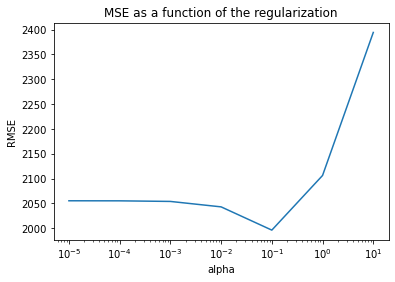

In [24]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10]
MEAN_SQE=[]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    MEAN_SQE.append(np.sqrt(mean_squared_error(ridge.predict(X_test),y_test)))

ax = plt.gca()
ax.plot(alphas, MEAN_SQE)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.title("MSE as a function of the regularization")
plt.show()

As we can see a small alpha leads to over-fitting but as alpha gets larger the MSE decreases. When alpha gets too large the MSE increases leading to underfitting. The optimal point seems to be in the middle, exactly as we predict the plot above this, that's in the 0.1 alpha term.


### GridSearchCV


In order to search for the best combination of hyperparameters we will use a GridSearchCV() function.

In [25]:
#we create a dictionary of parameters
param_grid = {"polynomial__degree": [1,2,3,4],
              "model__alpha":[0.0001,0.001,0.01,0.1,1,10]}

Input=[('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Ridge(alpha=1))]
pipe = Pipeline(Input)

We create the GridSearchCV object and fit it.

In [26]:
search = GridSearchCV(pipe, param_grid, n_jobs=2)

search.fit(X_train, y_train)
search

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Ridge(alpha=1))]),
             n_jobs=2,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'polynomial__degree': [1, 2, 3, 4]})

We will input the results into pandas DataFrame as a dictionary with keys as column headers and values as columns and display the results.


In [27]:
fr = pd.DataFrame(search.cv_results_).head()
# fr.shape #(24, 15)

Now we will check what is the best score and the best params.

In [28]:
print("best_score_: ",search.best_score_)
print("best_params_: ",search.best_params_)

best_score_:  0.8681282282391247
best_params_:  {'model__alpha': 10, 'polynomial__degree': 2}


As we see abov, the best score was 0.868 and the best params combination it was {'model__alpha': 10, 'polynomial__degree': 2}

We can find the best model.


In [29]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=10))])

As we can see from the above output, it is five degree polynomial with alpha value of 10.
Now, let's make a prediction.


In [30]:
predict = best.predict(X_test)
predict

array([34464.68303015, 23419.34979609,  9723.38208924, 13433.42551625,
       25239.67969507,  6532.54733115,  7468.55986929,  7687.50892226,
        9114.59988701,  9541.72323357, 15453.55023026,  6815.64031583,
       16958.71711106, 10290.1730189 , 42072.30176794,  6356.53352923,
        1536.17210277, 13705.75183086,  9758.24171738,  9210.40054167,
        9999.70716056])

We can calculate the R2 on the test data.

In [31]:
best.score(X_test, y_test)

0.9441203657848746

As we see, using Ridge Regression polynomial function works better than all other models. Finely, we can train our model on the entire data set!


In [32]:
best.fit(X,y)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=10))])

### Lasso Regression


Now, let's review the Lasso Regression. Lasso Regression makes the prior assumption that our coefficients have Laplace distribution around zero. The scale parameter of the distribution is inversely proportional to the parameter alpha. The main advantage of LASSO Regression is that many coefficients are set to zero, therefore they are not required. This has many advantages, one of them is that you may not need to collect and/or store all of the features. This may save resources. For example, if the feature was some medical test, you would no longer need to perform that test. 


First we create a Lasso Regression object, setting the regularization parameter (alpha) to 0.1.

In [33]:
la = Lasso(alpha=0.1)
la.fit(X_train,y_train)
la

Lasso(alpha=0.1)

Let's make a prediction.


In [34]:
predicted = la.predict(X_test)
predicted

array([30207.01664593, 22253.28978157, 11234.4293658 , 11825.51411381,
       26349.51670682,  5442.67340587,  9115.38970742,  7262.37834971,
       10602.22642602, 10426.6507622 , 17480.62216135,  6988.60683622,
       16570.42746876, 10462.5969077 , 41586.07832506,  5399.25186043,
        3317.54502062, 15367.96191917, 10698.17086097, 11451.72644684,
       10548.16668782])

Let's calculate the R2 on the training and testing data and see how it performs compared to the other methods.


In [35]:
print("R2 on training  data ",lm.score(X_train, y_train))
print("R2 on testing data ",lm.score(X_test,y_test))

R2 on training  data  0.9092101381197338
R2 on testing data  0.9472499250320893


If we compare the Lasso Regression to the  Ridge Regression model we see that the results on the R2 are slightly similar, but most of the coefficients are zero.


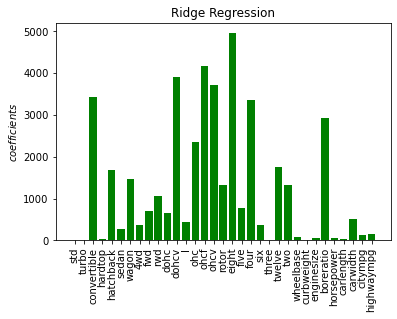

R2 on training  data  0.8991374778636108
R2 on testing data  0.9446031107273956


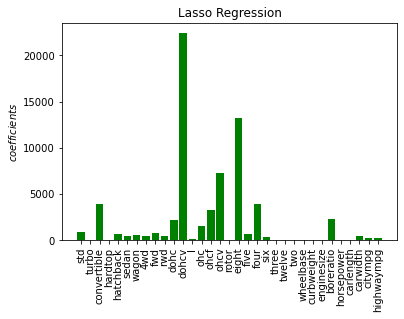

R2 on training  data  0.9092098726971481
R2 on testing data  0.9453258869077992


In [36]:
plot_coef(X,rr,name="Ridge Regression")
plot_coef(X,la,name="Lasso Regression")

Similar to the Ridge Regression, if we increase the value of alpha, the coefficients will get smaller. Additionally, many coefficients become zero. Moreover, the model performance relationship becomes more complex. As a result, we use the validation data to select a value for alpha. Here, we plot the coefficients and R2 of the test data on the vertical axes and alpha values on the horizontal axis.


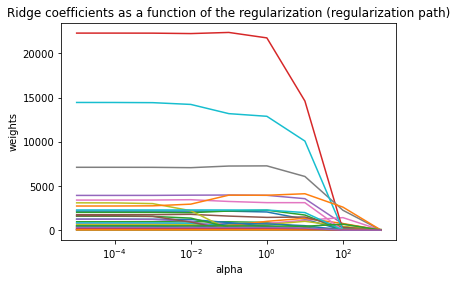

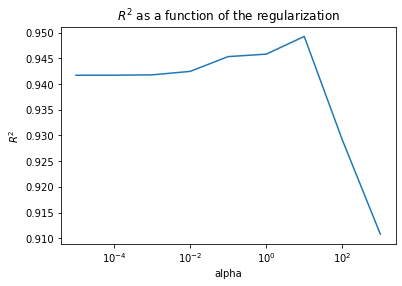

In [37]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
R_2=[]
coefs = []
for alpha in alphas:
    la=Lasso(alpha=alpha)
    
    la.fit(X_train, y_train)
    coefs.append(abs(la.coef_))
    R_2.append(la.score(X_test,y_test))


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization (regularization path)")
plt.show()


ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("$R^2$")
plt.title("$R^2$ as a function of the regularization")
plt.show()

Above we can see that the peak of R2 on the test set is in the value 10 alpha term.

### GridSearchCV

To search for the best combination of hyperparameters, we can create a GridSearchCV() function.

We start by creating a pipeline object.

In [38]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model',Lasso(alpha=1, tol = 0.2))]
pipe = Pipeline(Input)

Now we create a dictionary of parameters what we will use.

In [39]:
param_grid = {
    "polynomial__degree": [ 1, 2,3,4,5],
    "model__alpha":[0.0001,0.001,0.01,0.1,1,10]}

Then we create a GridSearchCV object with a dictionary of parameter values.


In [40]:
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Lasso(alpha=1, tol=0.2))]),
             n_jobs=2,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'polynomial__degree': [1, 2, 3, 4, 5]})

Now, we can find the best model.


In [41]:
best=search.best_estimator_
best

Pipeline(steps=[('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('ss', StandardScaler()), ('model', Lasso(alpha=10, tol=0.2))])

We can calculate the R2 on the test data.

In [42]:
best.score(X_test,y_test)

0.9390483610147888

As we see above, it's a good score 

### Elastic Net

Now we will make a Elastic Net Regression. This model combines L1 and L2.


First we create a model where alpha=0.1 and l1_ratio=0.5 and fit the data with this model.

In [43]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

We make a prediction.


In [44]:
predicted=enet.predict(X_test)
predicted

array([27876.23069332, 19692.47948228, 11278.55904242, 11378.11762817,
       25990.32173225,  5511.46549415,  7591.3310787 ,  7796.50950874,
        9762.62529929,  8646.72495203, 17018.24269379,  7412.95036812,
       17031.98094445, 10732.9267982 , 37491.12185882,  5254.66797235,
        -286.43084016, 16075.95423556, 11330.87482645, 10579.46380101,
       11539.66267619])

Let's calculate the R2 on the test data.


In [45]:
print("R2 on training  data ", enet.score(X_train, y_train))
print("R2 on testing data ", enet.score(X_test,y_test))

R2 on training  data  0.8726983414262407
R2 on testing data  0.9289334382162673


If we compare the Elastic Net to Lasso Regression and  Ridge Regression, we see the results on the R2 are better than the Elastic Net and many of the coefficients are zero.


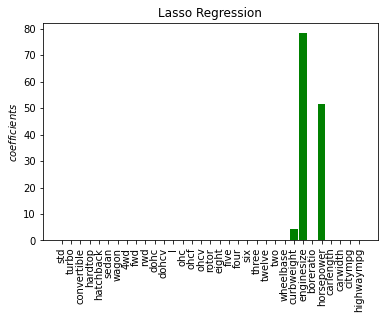

R2 on training  data  0.799083710857619
R2 on testing data  0.910818845927178


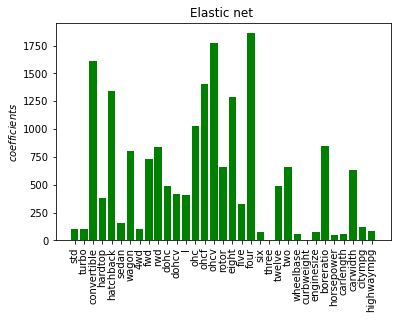

R2 on training  data  0.8726983414262407
R2 on testing data  0.9289334382162673


In [46]:
plot_coef(X,la,name="Lasso Regression")
plot_coef(X,enet,name="Elastic net ")

Now we will compare the Elastic net versus Ridge regression models and we will plot the coefficients.

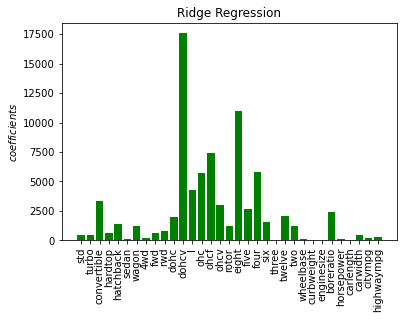

R2 on training  data  0.9091956531801181
R2 on testing data  0.9478784615596495


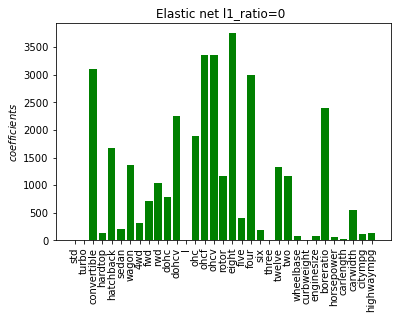

R2 on training  data  0.8941741868792896
R2 on testing data  0.940724027816336


In [47]:
enet = ElasticNet(alpha=0.01, l1_ratio=0)
enet.fit(X_train,y_train)

rr = Ridge(alpha=0.01)
rr.fit(X_train,y_train)

plot_coef(X,rr,name="Ridge Regression")
plot_coef(X,enet,name="Elastic net l1_ratio=0 ")

### Pipeline
Now we will create a pipeline model to apply some functions in order to fit the model.

We start by creating a pipeline object.

In [48]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), 
                                                                        ('model',ElasticNet(alpha=0.1, l1_ratio=0.1))]
pipe = Pipeline(Input)

We fit the model, with the train set.

In [49]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()),
                ('model', ElasticNet(alpha=0.1, l1_ratio=0.1))])

Now let's calculate the R2 on the test and train data, to see how it performs the model.

In [50]:
print("R2 on training  data ",pipe.score(X_train, y_train))
print("R2 on testing data ",pipe.score(X_test,y_test))

R2 on training  data  0.9703466188354504
R2 on testing data  0.9474289882341259


As we see above we have good performance on the Elastic Net model.